## 회귀분석 assignment2 / 최혜빈

In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [292]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## Load_data

In [338]:
#데이터 불러옵니다
df = pd.read_csv('Auction_master_train.csv')
df_year = df

In [294]:
#데이터 확인
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [295]:
#데이터 결측치 확인
df.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

### 결측치 제거

In [339]:
#결측치 column을 아예 제거
df = df.dropna(axis=1)

About data

In [340]:
#데이터 결측치가 제거된 것을 확인할 수 있음
#범주형 변수를 encoding하기 위해 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 35 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [298]:
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,16.980859,8.817900,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,9.509021,8.044644,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,3.000000,0.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,12.000000,3.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,15.000000,7.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,21.000000,12.000000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,80.000000,65.000000,37.685575,129.255872,1.515100e+10


## Task1. 범주형 변수 인코딩 3개 이상, EDA 3개 이상

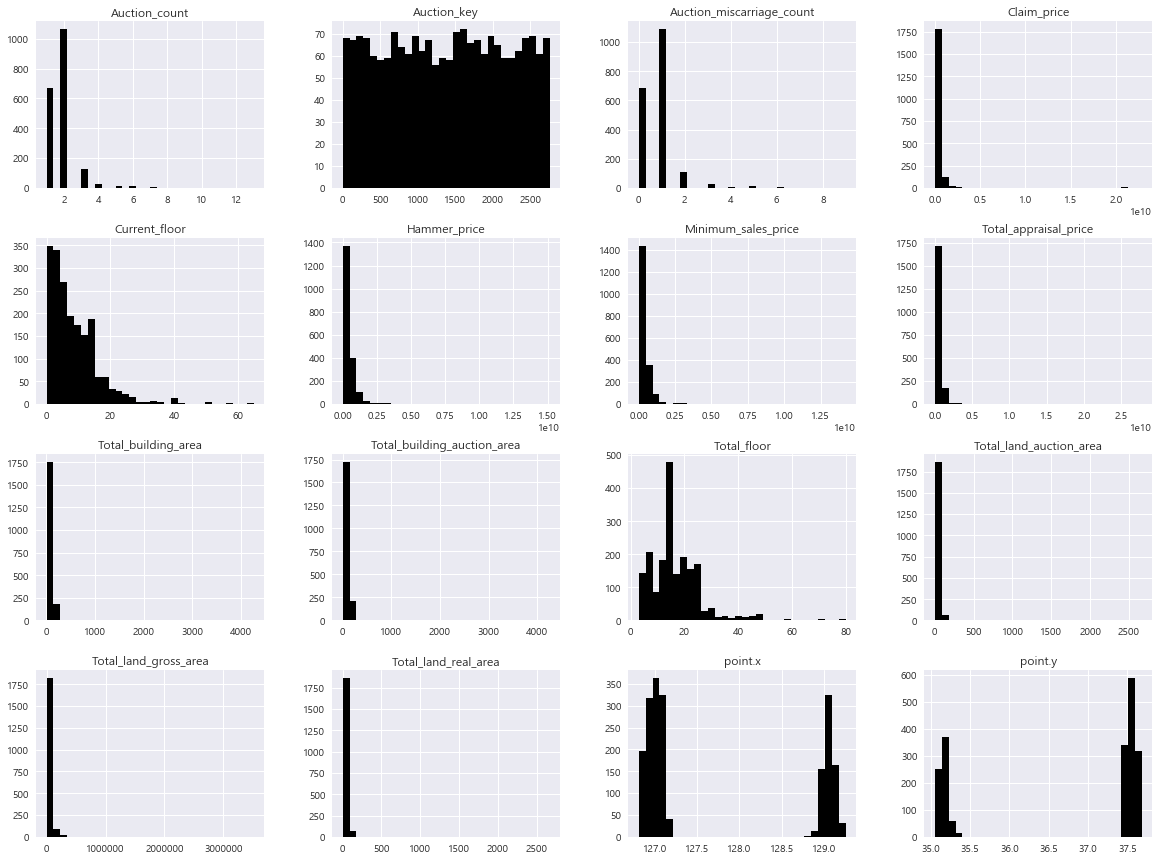

In [341]:
#먼저 모든 연속형 변수의 분포를 histogram으로 확인하였습니다
#확인결과 왼쪽에 과하게 치우쳐져 있는 연속형변수는 정규분포에 가깝게 변화시킨 feature를 추가하였습니다
df.hist(bins=30,figsize=(20,15), color='k')
plt.show()

In [342]:
#log distribution 하기
def log_distribution(x):
    f,ax = plt.subplots(1,2)
    
    x.hist(ax=ax[0],color = 'black')
    ax[0].set_title(x.name + '변환 전')
    
    np.log(x).hist(ax=ax[1],color = 'green')
    ax[1].set_title(x.name + '변환 후')
    plt.show()

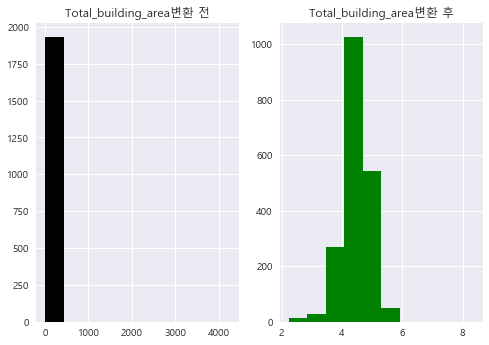

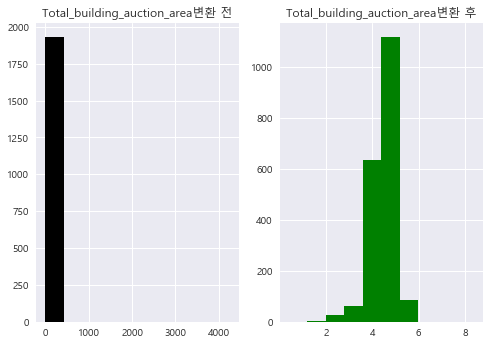

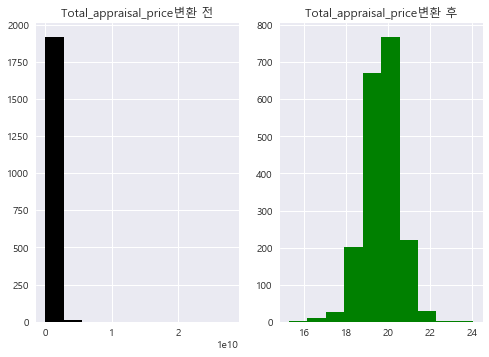

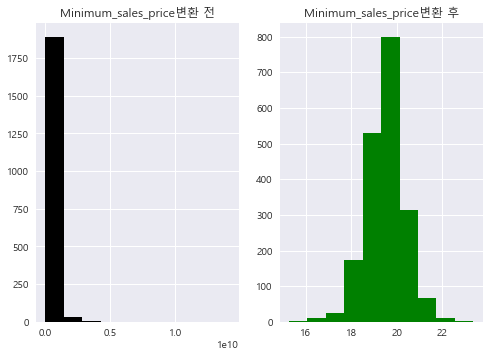

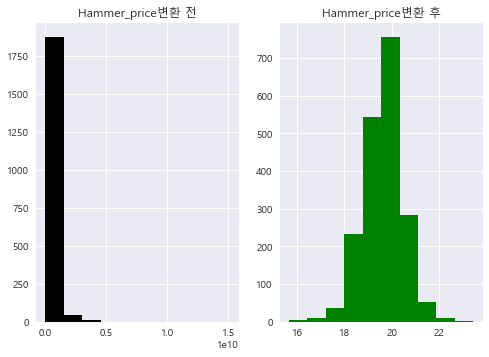

In [343]:
df_continuous = ['Claim_price', 'Total_land_gross_area', 'Total_land_real_area','Total_land_auction_area',
                          'Total_building_area','Total_building_auction_area','Total_appraisal_price','Minimum_sales_price','Hammer_price']
df_continuous.remove('Claim_price')
df_continuous.remove('Total_land_gross_area')
df_continuous.remove('Total_land_real_area')
df_continuous.remove('Total_land_auction_area')

for cols in df_continuous:
    try:
        log_distribution(df[cols])
    except:
        print(cols + ' 는 범위 오버')

In [344]:
for cols in df_continuous:
    df['log_'+ cols] =np.log(df[cols]+1)
    #총 5개의 feature을 추가하였습니다

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


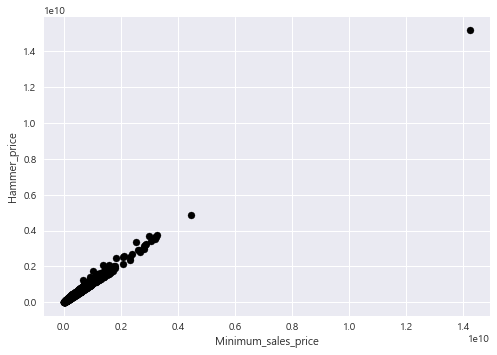

In [345]:
#다음과 같은 그래프를 통해 최저매각가격과 낙찰가의 관계를 알아볼 수 있습니다
#이 때 하나의 이상치가 발견되므로 이상치를 제거하였습니다
plt.scatter(x=df['Minimum_sales_price'],y = df['Hammer_price'],color = 'black')
plt.xlabel('Minimum_sales_price')
plt.ylabel('Hammer_price')

plt.show()



In [346]:
#이상치 제거
df = df.query('Minimum_sales_price>0 & Minimum_sales_price < 0.6*1e10 & Hammer_price>0')

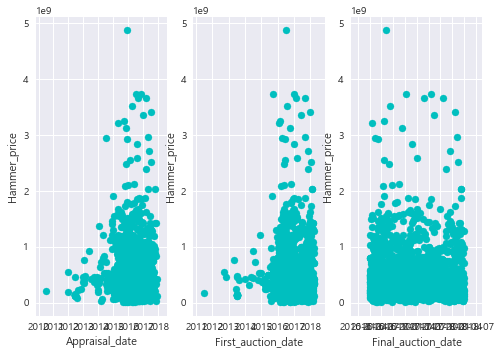

In [347]:
#날짜와 관련된 변수들과 낙찰가와의 관계를 scatter plot을 통해 확인하였습니다

#감정일자, 최초경매일이 최근에 가까울 수록 낙찰가가 높아지는 것을 확인할 수 있습니다
#시간이 지날수록 아파트 경매가격은 올라갔다를 확인할 수 있는데
#최종경매일 변수를 제외하고 연도별로 새로운 feature을 만들어 사용하기로 결정하였습니다

df['Appraisal_date'] = pd.to_datetime(df.Appraisal_date)
df.sort_values(by = ['Appraisal_date'],inplace=True, ascending=True)
plt.subplot(1,3,1)
plt.scatter(df['Appraisal_date'],df['Hammer_price'], color = 'c')
plt.xlabel('Appraisal_date')
plt.ylabel('Hammer_price')

df['First_auction_date'] = pd.to_datetime(df.First_auction_date)
df.sort_values(by = ['First_auction_date'],inplace=True, ascending=True)
plt.subplot(1,3,2)
plt.scatter(df['First_auction_date'],df['Hammer_price'], color = 'c')
plt.xlabel('First_auction_date')
plt.ylabel('Hammer_price')

df['Final_auction_date'] = pd.to_datetime(df.Final_auction_date)
df.sort_values(by = ['Final_auction_date'],inplace=True, ascending=True)
plt.subplot(1,3,3)
plt.scatter(df['Final_auction_date'],df['Hammer_price'], color = 'c')
plt.xlabel('Final_auction_date')
plt.ylabel('Hammer_price')

plt.show()

In [348]:
#기존 날짜 변수는 hammer price 예측에 필요하지 않을것이라 판단하여 제거하였습니다
df=df.drop(['Final_auction_date','Appraisal_date','First_auction_date'],axis = 1)

In [349]:
#data 변수들 모두 연도별로 나누는 feature 생성, 차이 feature 생성
def appraisal_year(x):
    if x[3] == '5':        
        return '2015'
    elif x[3] == '6':
        return '2016'
    elif x[3] == '7':
        return '2017'
    else:
        return '2015 이전'


df['Appraisal_year'] = df_year['Appraisal_date'].apply(appraisal_year)
#df['Appraisal_year'].value_counts()

def first_auction_year(x):
    if x[3] == '5':        
        return '2015'
    elif x[3] == '6':
        return '2016'
    elif x[3] == '7':
        return '2017'
    elif x[3] == '8':
        return '2018'
    else:
        return '2015 이전'

df['First_auction_year'] = df_year['First_auction_date'].apply(first_auction_year)
#df['First_auction_year'].value_counts()


def difference_of_price(x,y):
    difference = abs(x-y)
    return difference

df['Difference_of_price'] = df.apply(lambda x:difference_of_price(x['Minimum_sales_price'],x['Total_appraisal_price']),axis=1)

#연도 관련 feature들을 새로 추가함.

In [350]:
#건물 면적 비율 feature 추가
def building_area_ratio(x,y):
    ratio = abs(x/y*100)
    return ratio

df['Building_area_ratio'] = df.apply(lambda x:building_area_ratio(x['Total_building_auction_area'],x['Total_building_area']),axis=1)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 204 to 1252
Data columns (total 41 columns):
Auction_key                        1932 non-null int64
Auction_class                      1932 non-null object
Bid_class                          1932 non-null object
Claim_price                        1932 non-null int64
Appraisal_company                  1932 non-null object
Auction_count                      1932 non-null int64
Auction_miscarriage_count          1932 non-null int64
Total_land_gross_area              1932 non-null float64
Total_land_real_area               1932 non-null float64
Total_land_auction_area            1932 non-null float64
Total_building_area                1932 non-null float64
Total_building_auction_area        1932 non-null float64
Total_appraisal_price              1932 non-null int64
Minimum_sales_price                1932 non-null int64
Final_result                       1932 non-null object
Creditor                           1932 non-null obj

In [352]:
#아까 log distribution으로 새로운feature가 추가된 변수들의 기존변수는 제거하였습니다
df = df.drop(['Total_building_area','Total_building_auction_area','Total_appraisal_price','Minimum_sales_price'],axis=1)

In [353]:
#인코딩을 진행하기 전 제가 판단하기에 필요없는 설명변수는 제거하기로 하였습니다
#너무 많이 변수를 가지는, hammer price에 영향을 미치지 않는 듯한 고유변수들은 모두 제거하였고
#final result처럼 전혀 의미없는 것도 제거했습니다
#point.y point.x 역시 의미없다고 판단했습니다
df= df.drop(['Auction_key','Appraisal_company','Final_result','Creditor','addr_do','addr_si',
            'addr_dong','addr_san','addr_etc','Apartment_usage','Preserve_regist_date',
            'road_name','Close_date','Close_result','point.y','point.x'],axis=1)

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 204 to 1252
Data columns (total 21 columns):
Auction_class                      1932 non-null object
Bid_class                          1932 non-null object
Claim_price                        1932 non-null int64
Auction_count                      1932 non-null int64
Auction_miscarriage_count          1932 non-null int64
Total_land_gross_area              1932 non-null float64
Total_land_real_area               1932 non-null float64
Total_land_auction_area            1932 non-null float64
Total_floor                        1932 non-null int64
Current_floor                      1932 non-null int64
Share_auction_YorN                 1932 non-null object
Hammer_price                       1932 non-null int64
log_Total_building_area            1932 non-null float64
log_Total_building_auction_area    1932 non-null float64
log_Total_appraisal_price          1932 non-null float64
log_Minimum_sales_price            1932 non-null fl

In [355]:
#필요없는 변수 제거 후 남은 범주형 변수를 인코딩하였습니다
df.Share_auction_YorN.value_counts()

N    1853
Y      79
Name: Share_auction_YorN, dtype: int64

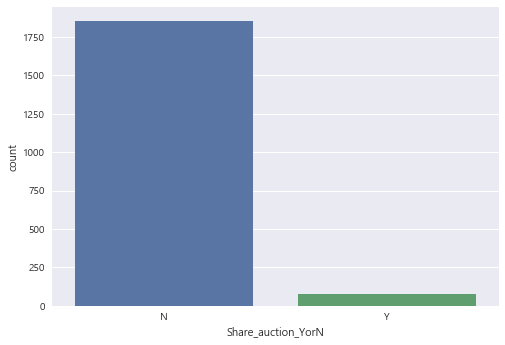

In [356]:
sns.countplot(df.Share_auction_YorN)

In [357]:
#Y는 0 N는 1로 인코딩 진행하였습니다
def encoding_YorN (x):
    if x == 'Y':
        return 0
    else:
        return 1

In [358]:
df.Share_auction_YorN = df.Share_auction_YorN.apply(encoding_YorN)

In [359]:
df.Share_auction_YorN.value_counts()

1    1853
0      79
Name: Share_auction_YorN, dtype: int64

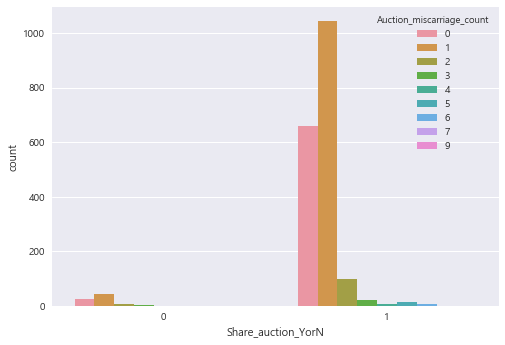

In [360]:
sns.countplot(x='Share_auction_YorN', hue='Auction_miscarriage_count', data=df)
#확인해보면 이 변수는 2이상을 거의 넘어가지 않고 거의 0과 1로 나뉘는 걸 확인할 수 있습니다
#그래서 count보다는 유찰의 유무로 판단하는게 좋다고 생각해
#YorN로 feature를 생성하였고 앞서 만들어 둔 인코딩 함수를 적용하였습니다

In [361]:
#유찰 유무 feature 생성
def auction_miscarriage_YorN(x):
    if x<1:
        return 'N'
    else:
        return 'Y'
    
    
df['Auction_miscarriage_YorN'] = df['Auction_miscarriage_count'].apply(auction_miscarriage_YorN)
df['Auction_miscarriage_YorN'].value_counts()
df = df.drop(['Auction_miscarriage_count'],axis = 1)
#기존의 count변수는 제거하였습니다

In [362]:
df.Auction_miscarriage_YorN = df.Auction_miscarriage_YorN.apply(encoding_YorN)
#이 feature역시 아까 만들어 둔 YorN 인코딩함수를 이용해 인코딩 하였습니다

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 204 to 1252
Data columns (total 21 columns):
Auction_class                      1932 non-null object
Bid_class                          1932 non-null object
Claim_price                        1932 non-null int64
Auction_count                      1932 non-null int64
Total_land_gross_area              1932 non-null float64
Total_land_real_area               1932 non-null float64
Total_land_auction_area            1932 non-null float64
Total_floor                        1932 non-null int64
Current_floor                      1932 non-null int64
Share_auction_YorN                 1932 non-null int64
Hammer_price                       1932 non-null int64
log_Total_building_area            1932 non-null float64
log_Total_building_auction_area    1932 non-null float64
log_Total_appraisal_price          1932 non-null float64
log_Minimum_sales_price            1932 non-null float64
log_Hammer_price                   1932 non-null f

In [364]:
#아래의 코드로 진행하였지만 원핫인코딩 후 다중공산성 확인했을 때 너무 큰 수들이 나와서
#사용할 의미가 없는 것 같아 범주형 변수들 중 first_auction_year만 사용하였습니다
#categoricals = ['Bid_class','Auction_class','Appraisal_year','First_auction_year']
categoricals = ['First_auction_year']

In [365]:
df_categs = pd.get_dummies(df[categoricals],prefix = categoricals)

In [366]:
#기존의 범주형변수들은 모두 제거하고 one hot encoding으로 생성된 변수들을 더했습니다
df= pd.concat([df.drop(['Auction_class','Bid_class',
               'Appraisal_year','First_auction_year'],axis=1),df_categs],axis=1)

In [367]:
X = df.drop(['log_Hammer_price','Hammer_price'],axis=1)
y = df.Hammer_price

In [368]:
X.shape, y.shape

((1932, 20), (1932,))

In [369]:
X.corr()

,Claim_price,Auction_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_floor,Current_floor,Share_auction_YorN,log_Total_building_area,log_Total_building_auction_area,log_Total_appraisal_price,log_Minimum_sales_price,Difference_of_price,Building_area_ratio,Auction_miscarriage_YorN,First_auction_year_2015,First_auction_year_2015 이전,First_auction_year_2016,First_auction_year_2017,First_auction_year_2018
Claim_price,1.000000,0.005717,0.005043,0.117144,0.121237,0.019113,0.047002,0.029513,0.145584,0.142402,0.177312,0.174701,0.148365,0.031503,0.049104,0.001557,0.037002,-0.004139,-0.001643,-0.010586
Auction_count,0.005717,1.000000,-0.045324,0.036712,0.036732,-0.051531,-0.028008,-0.019648,0.110772,0.090713,-0.001665,-0.190868,0.432083,-0.015813,-0.646514,0.172306,0.359671,-0.039949,-0.080172,-0.086822
Total_land_gross_area,0.005043,-0.045324,1.000000,0.142024,0.137205,0.100435,0.094227,0.000586,0.078154,0.068408,0.123398,0.131320,0.013118,0.000328,0.035045,-0.002854,-0.017775,-0.015464,0.014292,0.016646
Total_land_real_area,0.117144,0.036712,0.142024,1.000000,0.977079,-0.141661,-0.105016,-0.001331,0.548987,0.486701,0.425335,0.407453,0.454705,0.004663,-0.054817,-0.004436,-0.031842,0.043196,-0.035779,0.004352
Total_land_auction_area,0.121237,0.036732,0.137205,0.977079,1.000000,-0.130549,-0.100943,0.184961,0.536588,0.559222,0.460230,0.442062,0.461231,0.193758,-0.053225,-0.001222,-0.028159,0.052797,-0.041599,-0.009662
Total_floor,0.019113,-0.051531,0.100435,-0.141661,-0.130549,1.000000,0.708057,0.052443,0.317782,0.304942,0.326531,0.329075,0.194363,0.055528,-0.012559,-0.008589,-0.017171,-0.000878,-0.002318,0.025037
Current_floor,0.047002,-0.028008,0.094227,-0.105016,-0.100943,0.708057,1.000000,0.016877,0.221046,0.206004,0.251796,0.252539,0.182830,0.022754,-0.013188,0.015660,0.000026,0.009819,-0.019953,0.009789
Share_auction_YorN,0.029513,-0.019648,0.000586,-0.001331,0.184961,0.052443,0.016877,1.000000,0.005464,0.417297,0.243930,0.245719,0.056961,0.963972,0.021908,0.008478,0.007758,0.054032,-0.027197,-0.075669
log_Total_building_area,0.145584,0.110772,0.078154,0.548987,0.536588,0.317782,0.221046,0.005464,1.000000,0.888344,0.718230,0.678935,0.482347,0.015072,-0.157260,0.055316,0.058596,0.045055,-0.090938,0.021311
log_Total_building_auction_area,0.142402,0.090713,0.068408,0.486701,0.559222,0.304942,0.206004,0.417297,0.888344,1.000000,0.769034,0.734121,0.453365,0.463104,-0.130489,0.053615,0.059806,0.063788,-0.093544,-0.015807


In [370]:
#VIF확인하기(다중공산성 확인)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
17,4965.226351,First_auction_year_2016
18,4024.093129,First_auction_year_2017
19,479.639204,First_auction_year_2018
9,454.834983,log_Total_building_auction_area
11,373.891850,log_Minimum_sales_price
10,366.897284,log_Total_appraisal_price
8,351.736349,log_Total_building_area
15,326.616533,First_auction_year_2015
13,268.041458,Building_area_ratio
16,178.696326,First_auction_year_2015 이전


In [371]:
#원핫인코딩을 진행한 변수 하나쯤은 두고 싶었는데 전부 다 너무 다중공산성이 높아서 
#그냥 다 제거시켰습니다ㅠㅠ
X = X.drop(['log_Minimum_sales_price','log_Total_building_auction_area','log_Total_building_area',
           'Total_land_auction_area','First_auction_year_2016','First_auction_year_2017',
           'First_auction_year_2018','First_auction_year_2015','First_auction_year_2015 이전']
             ,axis=1)
y = df.Hammer_price
#앞서 확인한 다중공산성이 높은 변수들 중 price관련 변수 하나, area 변수 하나 빼고 모두 제거한 뒤 선형회귀를 진행하였습니다
#first auction year의 경우 그냥 다 제거했습니다.. 다중공산성이 너무 높아서ㅠㅠ

In [372]:
#VIF 다시 확인하기..
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
10,200297.789511,log_Total_appraisal_price
11,193228.335670,log_Minimum_sales_price
8,4651.725051,log_Total_building_area
9,3945.622431,log_Total_building_auction_area
13,2212.865553,Building_area_ratio
7,433.161747,Share_auction_YorN
3,353.289912,Total_land_real_area
4,348.257018,Total_land_auction_area
1,50.078129,Auction_count
5,10.202512,Total_floor


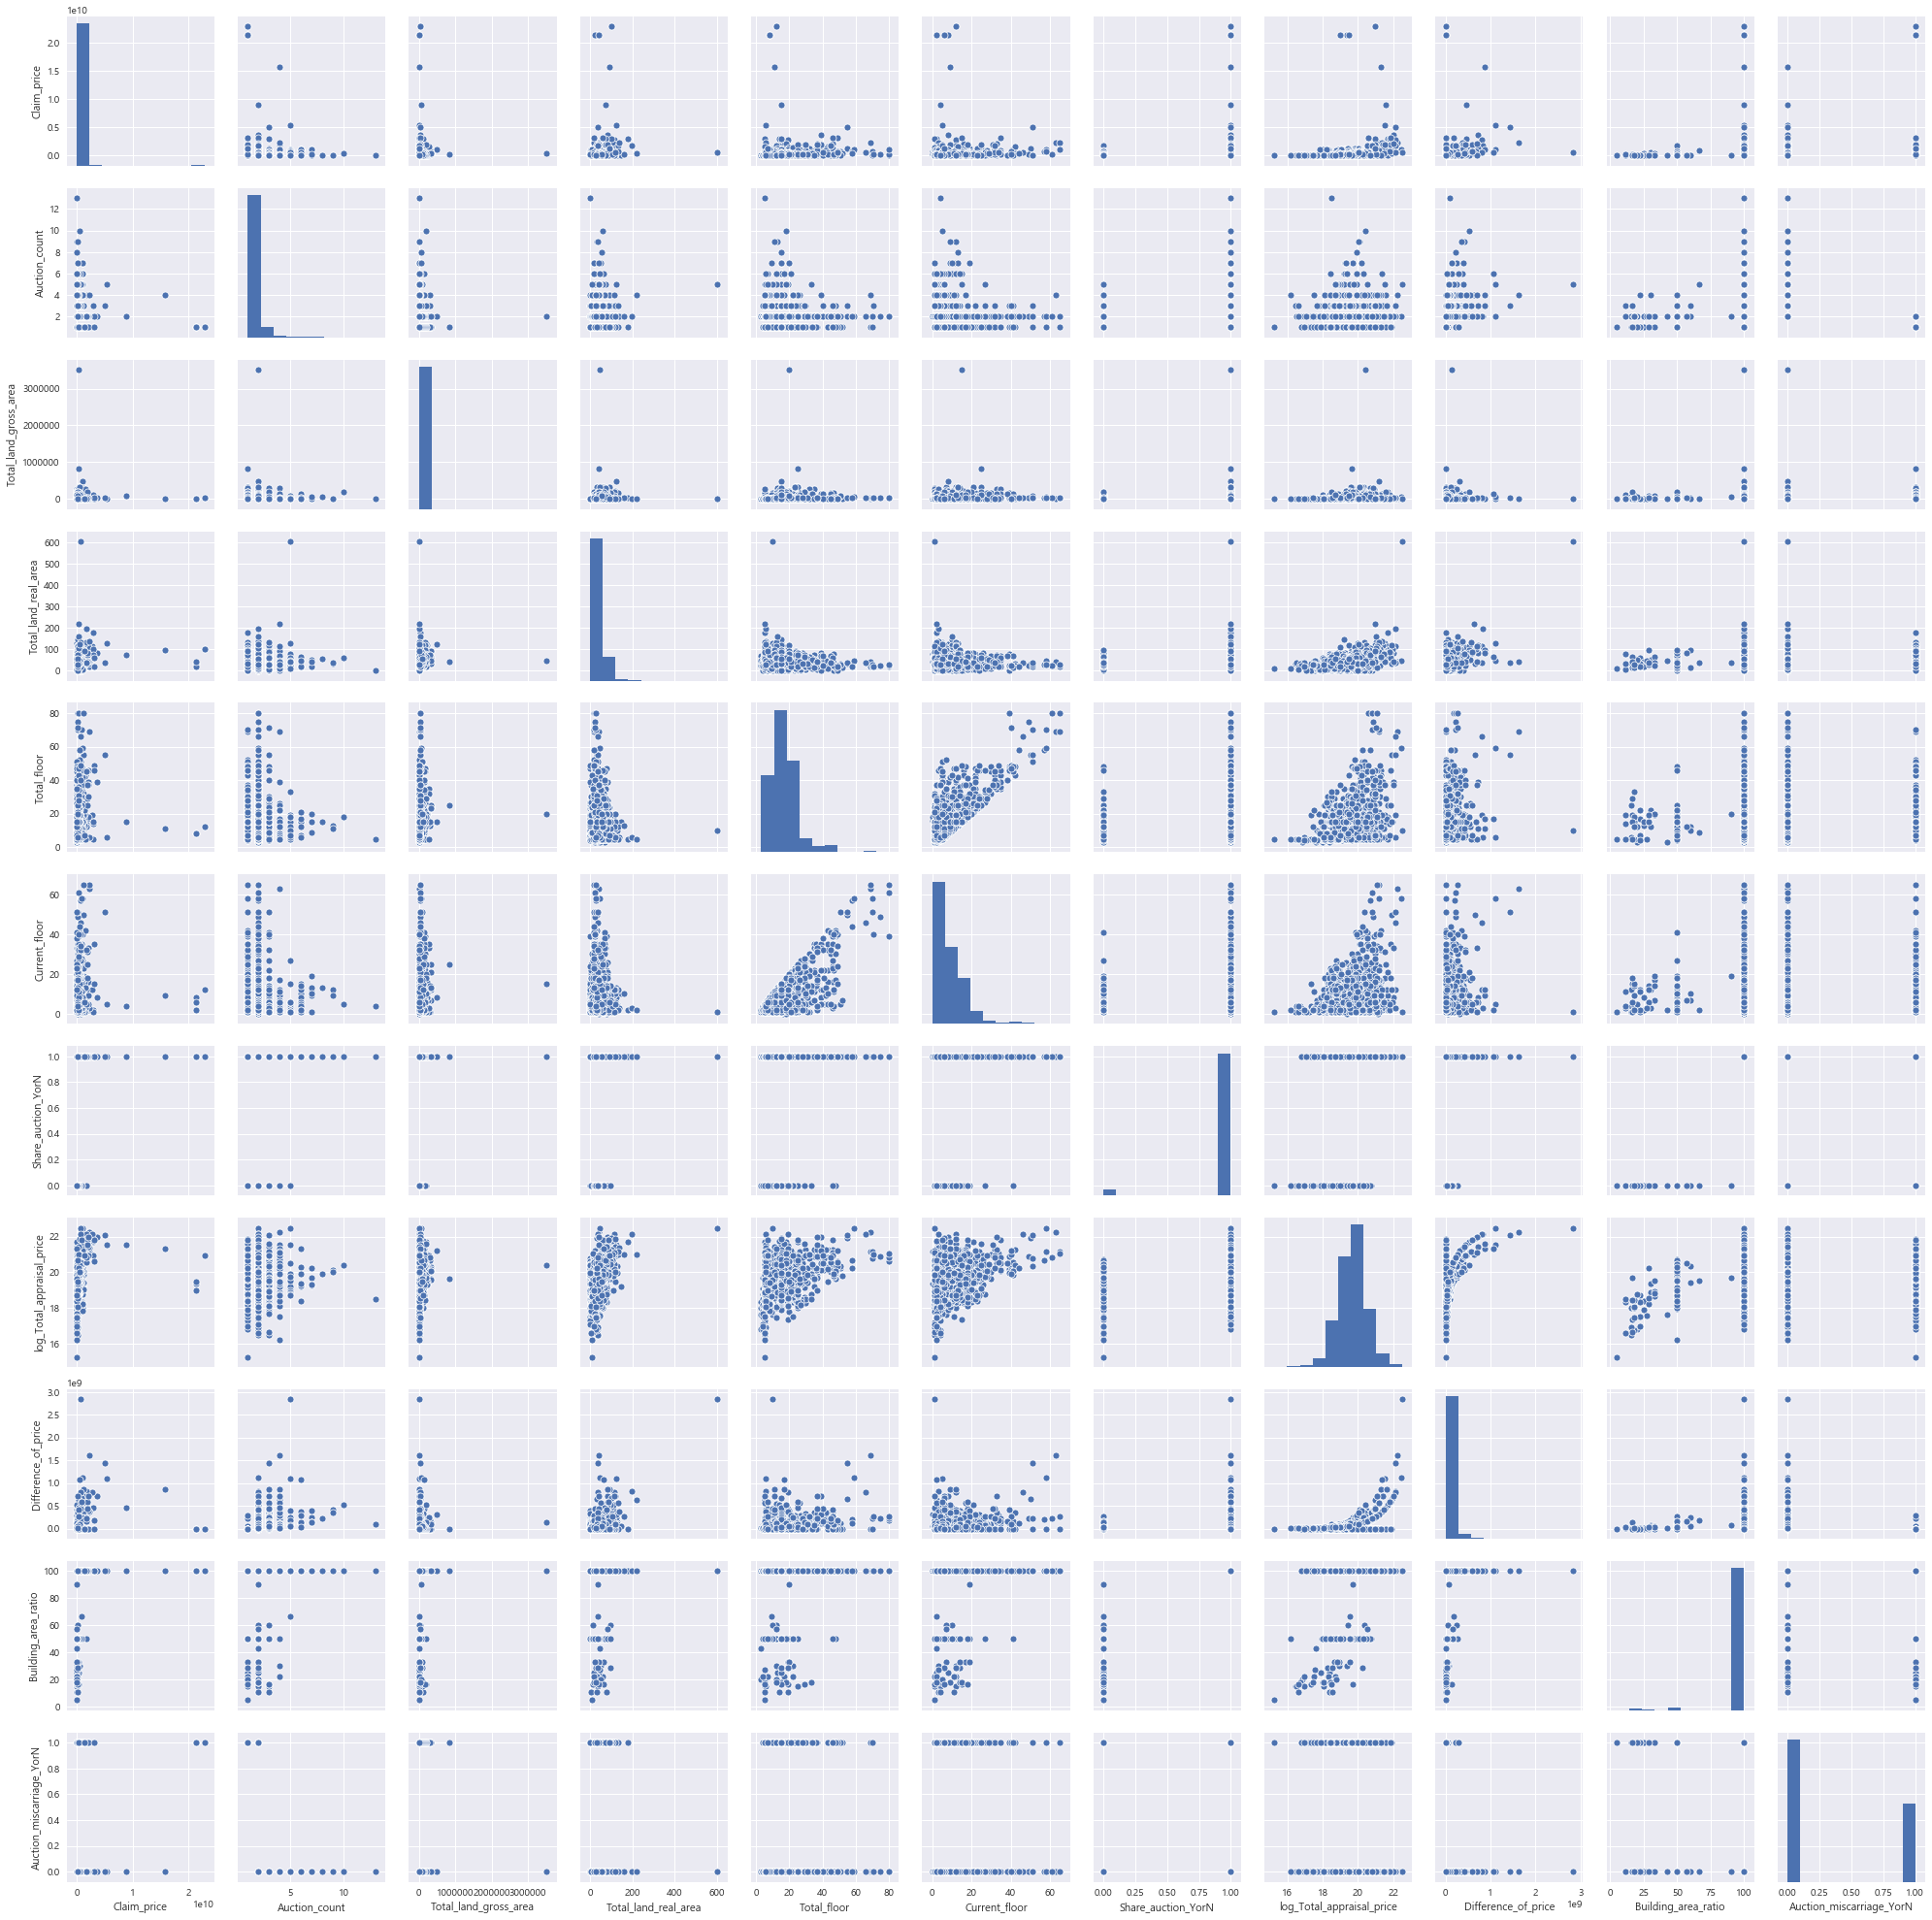

In [332]:
sns.pairplot(X)

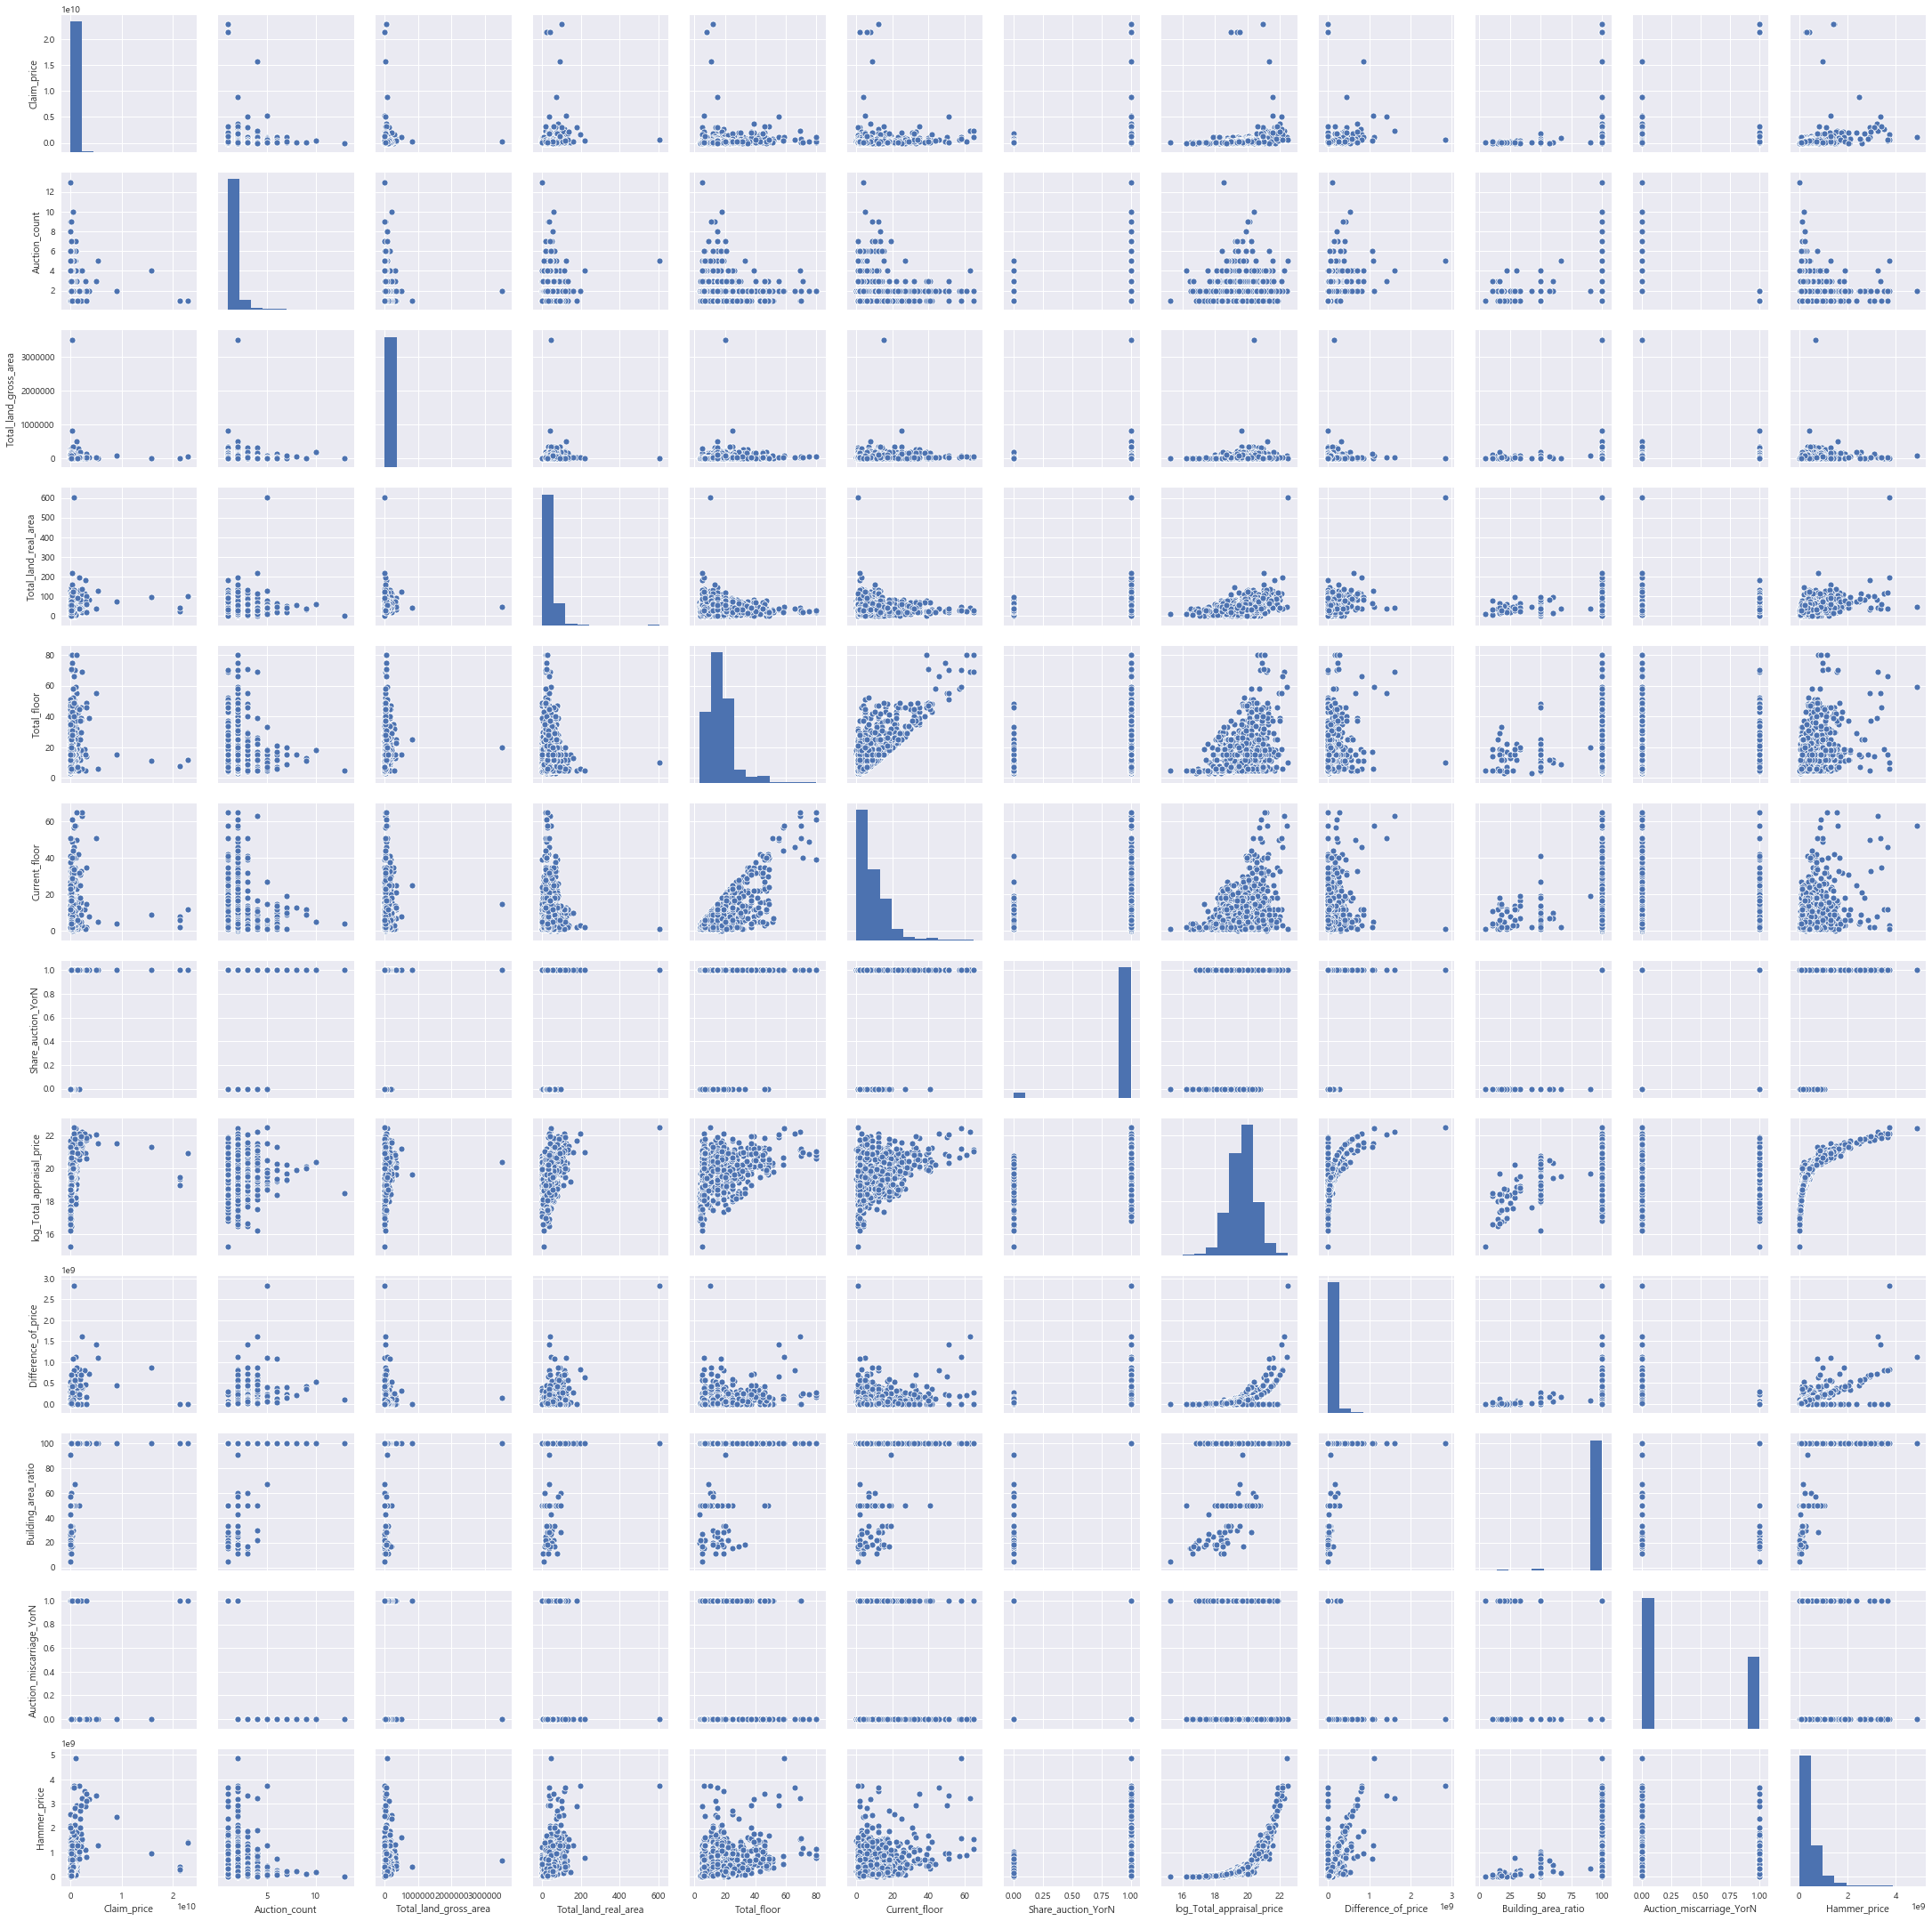

In [333]:
data= pd.concat([X,df['Hammer_price']],axis=1)
sns.pairplot(data)

## model 적용해서 선형회귀 진행(Linear Regression)

In [373]:
#앞서 선별한 설명변수들을 사용하여 선형회귀를 진행하였습니다

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [374]:
from sklearn.linear_model import LinearRegression

#선형회귀 모델 불러오기
model = LinearRegression()
#train data에 fir시킴
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [377]:
#fit된 모델의 R-square를 구합니다
model.score(X_train,y_train)

0.7826231729240483

In [378]:
#모델 적용한 후 MSE를 구할 수 있습니다(이 값은 sklearn을 이용하여 구한 값)
import sklearn as sk
sk.metrics.mean_squared_error(y_test, model.predict(X_test))

2.8467263176657516e+16

In [379]:
print(model.coef_) #추정된 회귀계수(intercept제외)
print(model.intercept_) #intercept

[ 1.72472116e-02  6.35295067e+06 -2.63508360e+02 -7.27587665e+06
  8.80227179e+06  1.13491352e+05  3.73796830e+06  1.39135733e+08
  2.27665590e+08 -3.42937507e+08 -1.56351728e+08  5.57514127e+08
  1.11759972e+00 -3.12015156e+06  2.49959228e+07]
-6850640174.8425255


In [380]:
#test데이터 예측
model.predict(X_test)

array([ 4.80528438e+08, -3.89155418e+08,  1.18717731e+09,  1.95038139e+09,
        3.90411596e+08,  4.17764960e+08,  4.99835318e+08,  7.01836565e+08,
        1.01632561e+09,  5.86599891e+08,  3.80355399e+08,  4.75936914e+08,
        6.80996911e+08,  3.34118501e+08, -1.59480317e+08,  5.60704290e+08,
        3.73205443e+08,  3.62370074e+08,  1.78621186e+09,  1.94648062e+08,
        5.22954007e+07,  1.43943348e+09,  5.73232505e+08,  4.35398089e+08,
        2.76643470e+08,  6.16041225e+08,  4.08197498e+08,  7.22241117e+08,
        1.03814139e+09,  1.69083135e+09,  4.05221620e+08,  1.89127352e+08,
        2.65769306e+08, -8.89100355e+07,  3.05392536e+08, -3.07976004e+08,
        3.34506658e+08,  7.61114807e+07,  3.96762757e+08,  5.69167658e+08,
        3.28669011e+08,  8.48314362e+08,  5.09535935e+08,  5.72650178e+08,
        8.61818759e+08, -3.56633929e+08,  2.39554531e+08,  8.06400284e+08,
        8.84005991e+07, -6.16344238e+08,  1.27987066e+09, -5.91694817e+08,
        4.48108989e+08,  

In [381]:
#test데이터 R-square
model.score(X_test, y_test)

0.8079675180526322

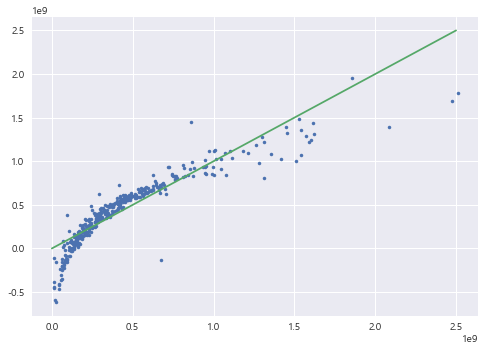

In [403]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 2.5*1e9)
y = x
plt.plot(x, y)
plt.show()

#데이터 분포를 보니까 선형회귀모델이 적합해 보이지는 않네요..!

## MSE 행렬식을 이용하여 구하기

In [383]:
idx=0
new_col=1
X_train.insert(idx,column='one',value =new_col)
X_train
#행렬식을 이용해서 mse를 구하기 위해 먼저 x_train set에 bias term을 먼저 추가하였습니다

,one,Claim_price,Auction_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_floor,Current_floor,Share_auction_YorN,log_Total_building_area,log_Total_building_auction_area,log_Total_appraisal_price,log_Minimum_sales_price,Difference_of_price,Building_area_ratio,Auction_miscarriage_YorN
1742,1,1162772146,2,10690.5,29.09,29.09,31,5,1,5.111807,5.111807,21.052570,20.829426,278000000,100.000000,0
754,1,4348656,2,13759.6,43.19,7.85,18,15,0,4.752210,3.085573,18.459901,18.236758,20800000,18.181818,0
75,1,81466330,2,32711.6,29.85,29.85,25,22,1,4.110546,4.110546,18.858936,18.635792,31000000,100.000000,0
1601,1,369146074,2,72875.6,44.42,44.42,18,2,1,4.453998,4.453998,19.902285,19.679142,88000000,100.000000,0
1088,1,750000000,2,155041.1,89.71,89.71,15,2,1,4.594311,4.594311,20.673025,20.449881,190200000,100.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,1,85698932,1,40243.2,41.14,41.14,14,4,1,3.935349,3.935349,19.287781,19.287781,0,100.000000,1
43,1,25750841,2,15695.4,18.07,18.07,24,15,1,4.107919,4.107919,19.308572,19.085428,48600000,100.000000,0
662,1,70000000,2,8880.0,31.69,31.69,22,9,1,4.449685,4.449685,19.073006,18.849862,38400000,100.000000,0
1121,1,80000000,2,30836.7,46.71,46.71,10,4,1,4.454347,4.454347,19.968243,19.745100,94000000,100.000000,0


In [384]:
y_train

1742    1340000000
754       93610000
75       155000000
1601     412989000
1088     900000000
           ...    
854      245880000
43       236640000
662      170010000
1121     484150000
1877     493500000
Name: Hammer_price, Length: 1545, dtype: int64

In [385]:
#행렬이용해서 MSE를 구했습니다
beta = np.dot(np.linalg.inv(np.dot(X_train.transpose(),X_train)),np.dot(X_train.transpose(),y_train))
y_predict = np.dot(X_train,beta)
e = y_train - y_predict
sse = np.dot(e.transpose(),e)
n=len(y_train)
k=28
mse = sse/(n-k-1)
mse

#앞서 구했던 mse값이 너무 커서 차이가 커보이기는 하네요ㅠㅠ

4.692937568989367e+16

## Ridge, Lasso 회귀 사용해보기

In [386]:
#Ridge, Lasso 회귀도 한번 사용해보았습니다!(튜토리얼 그대로 따라해보았습니다)
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.20574e-22): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [387]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>

In [388]:
#R-square
ridge.score(X_train,y_train)

0.7823529002193115

In [389]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.26172e-22): result may not be accurate.
  overwrite_a=True).T


0.782568636759142

In [390]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5574600397925073e+19, tolerance: 3.272884902355332e+16
  positive)


0.7826101386180007